# Pre - Procesamiento

In [1]:
!pip install librosa

In [2]:
import librosa
from IPython.display import Audio
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
import numpy as np
import time
  
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

def capture_sounds(nbr_records=5,sounds=["cero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"]):
  file_list=list()
  for sound in sounds:
    text="Por favor diga una vez la palabra '{}' después de cada indicación".format(sound)
    print(text)
    time.sleep(1)
    for nbr in range(nbr_records):
      print("Diga {}".format(sound))
      audio=record(1)
      audio.export("{}_{}.mp3".format(sound,nbr),format="mp3")
      file_list.append("{}_{}.mp3".format(sound,nbr))
  return file_list
  
  

In [4]:
file_list=capture_sounds()

Por favor diga una vez la palabra 'cero' después de cada indicación
Diga cero


<IPython.core.display.Javascript object>

Diga cero


<IPython.core.display.Javascript object>

Diga cero


<IPython.core.display.Javascript object>

Diga cero


<IPython.core.display.Javascript object>

Diga cero


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'uno' después de cada indicación
Diga uno


<IPython.core.display.Javascript object>

Diga uno


<IPython.core.display.Javascript object>

Diga uno


<IPython.core.display.Javascript object>

Diga uno


<IPython.core.display.Javascript object>

Diga uno


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'dos' después de cada indicación
Diga dos


<IPython.core.display.Javascript object>

Diga dos


<IPython.core.display.Javascript object>

Diga dos


<IPython.core.display.Javascript object>

Diga dos


<IPython.core.display.Javascript object>

Diga dos


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'tres' después de cada indicación
Diga tres


<IPython.core.display.Javascript object>

Diga tres


<IPython.core.display.Javascript object>

Diga tres


<IPython.core.display.Javascript object>

Diga tres


<IPython.core.display.Javascript object>

Diga tres


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'cuatro' después de cada indicación
Diga cuatro


<IPython.core.display.Javascript object>

Diga cuatro


<IPython.core.display.Javascript object>

Diga cuatro


<IPython.core.display.Javascript object>

Diga cuatro


<IPython.core.display.Javascript object>

Diga cuatro


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'cinco' después de cada indicación
Diga cinco


<IPython.core.display.Javascript object>

Diga cinco


<IPython.core.display.Javascript object>

Diga cinco


<IPython.core.display.Javascript object>

Diga cinco


<IPython.core.display.Javascript object>

Diga cinco


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'seis' después de cada indicación
Diga seis


<IPython.core.display.Javascript object>

Diga seis


<IPython.core.display.Javascript object>

Diga seis


<IPython.core.display.Javascript object>

Diga seis


<IPython.core.display.Javascript object>

Diga seis


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'siete' después de cada indicación
Diga siete


<IPython.core.display.Javascript object>

Diga siete


<IPython.core.display.Javascript object>

Diga siete


<IPython.core.display.Javascript object>

Diga siete


<IPython.core.display.Javascript object>

Diga siete


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'ocho' después de cada indicación
Diga ocho


<IPython.core.display.Javascript object>

Diga ocho


<IPython.core.display.Javascript object>

Diga ocho


<IPython.core.display.Javascript object>

Diga ocho


<IPython.core.display.Javascript object>

Diga ocho


<IPython.core.display.Javascript object>

Por favor diga una vez la palabra 'nueve' después de cada indicación
Diga nueve


<IPython.core.display.Javascript object>

Diga nueve


<IPython.core.display.Javascript object>

Diga nueve


<IPython.core.display.Javascript object>

Diga nueve


<IPython.core.display.Javascript object>

Diga nueve


<IPython.core.display.Javascript object>

In [5]:
#Cargamos todos los audios generados anteriormente en una lista
audios=list()
for file in file_list:
  audios.append(librosa.load(file)[0])
audios=np.array(audios)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [6]:
#Calculamos los mfcc para cada uno de los audios
mfccs=list()
for audio in audios:
  mfccs.append(librosa.feature.mfcc(audio,22050,n_mfcc=20))

In [7]:
#Generamos los labels para el clasificador
labels=list()
for i in range(10):
  for j in range(5):
    labels.append(i)
labels=np.array(labels)

In [8]:
#A partir de los mfcc generamos los features de entrada, que van a ser los promedios de cada uno de los mfcc
features=list()
for mfcc in mfccs:
  features.append(mfcc.mean(axis=1))
features=np.array(features)

# Comparemos las características de clustering del audio sin procesar y de los MFCC

Text(0.5, 1.0, 'T-SNE de los vectores de audio')

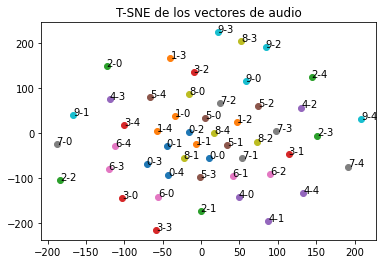

In [9]:
from sklearn.manifold import TSNE
tsn=TSNE(n_components=2,perplexity=20,n_iter=10000)
X=tsn.fit_transform(audios)
for idx in range(10):
  plt.scatter(X[idx*5:(idx+1)*5,0],X[idx*5:(idx+1)*5,1])
  for pnt in range(5):
    plt.text(X[idx*5+pnt,0],X[idx*5+pnt,1],s=str(idx)+"-"+str(pnt))
plt.title("T-SNE de los vectores de audio")

Text(0.5, 1.0, 'T-SNE de los vectores de features')

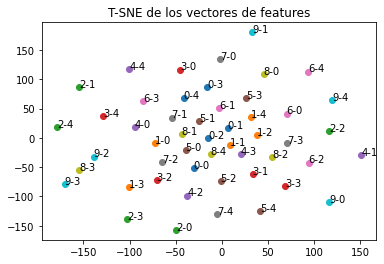

In [10]:
X=tsn.fit_transform(audios) #X=tsn.fit_transform(x.todense())
for idx in range(10):
  plt.scatter(X[idx*5:(idx+1)*5,0],X[idx*5:(idx+1)*5,1])
  for pnt in range(5):
    plt.text(X[idx*5+pnt,0],X[idx*5+pnt,1],s=str(idx)+"-"+str(pnt))
plt.title("T-SNE de los vectores de features")

## ``StratifiedKFold con (n_splits=5)``



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(audios, labels):
  X_train, X_test = audios[train_index], audios[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=LogisticRegression(C=1,solver="lbfgs",multi_class="multinomial",max_iter=10000)
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.1
0.1
0.0
0.0
0.1


In [12]:
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(audios, labels):
  X_train, X_test = audios[train_index], audios[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=SVC(kernel="rbf",max_iter=10000,gamma="auto")
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.0
0.1
0.2
0.3
0.1


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=LogisticRegression(C=1,solver="lbfgs",multi_class="multinomial",max_iter=10000)
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))


0.8
0.9
0.9
1.0
0.7


In [14]:
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=SVC(kernel="linear",max_iter=10000,gamma="auto")
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.8
0.9
0.9
0.8
0.9


## ``StratifiedKFold con (n_splits=3):``

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(audios, labels):
  X_train, X_test = audios[train_index], audios[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=LogisticRegression(C=1,solver="lbfgs",multi_class="multinomial",max_iter=10000)
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.0
0.0
0.0625


In [18]:
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(audios, labels):
  X_train, X_test = audios[train_index], audios[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=SVC(kernel="rbf",max_iter=10000,gamma="auto")
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.058823529411764705
0.058823529411764705
0.0625


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=LogisticRegression(C=1,solver="lbfgs",multi_class="multinomial",max_iter=10000)
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.7647058823529411
0.9411764705882353
0.8125


In [20]:
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=SVC(kernel="linear",max_iter=10000,gamma="auto")
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.7647058823529411
0.8235294117647058
0.875


# **CUESTIONARIO**

## 1- ¿Cuántas muestras correspenden a una grabación de un número en particular?

In [16]:
print(len(audio))

21168


## 2- Debido a la cantidad de samples que se tienen, ¿cuál es el método de validación mas propicio?

In [27]:
print("Stratified K-Folding (K=5)")
#Este resultado se debe a la baja performance
#que se obtuvo con K=3

Stratified K-Folding (K=5)


## 3- Cómo queda representado cada audio a partir de sus MFCCs?

In [22]:
print(len(mfccs))

50


In [24]:
np.shape(mfccs)

(50, 20, 42)

## 4- Indique cuáles de los siguientes features podrían utilizarse para clasificar los audios:



*   ``Media de las filas de la matriz de MFCC``
*   Media de las columnas de la matriz de MFCC
*   ``Desvío estandar de las filas de la matriz de MFCC``
*   Desvío estandar de las columnas de la matriz de MFCC
*   ``Mediana de las filas de la matriz de MFCC``
*   Mediana de las columnas de la matriz de MFCC
*   Vector de audio original


### <font color='brown'> ``Las respuestas correctas son las que están marcadas arriba``</font>